In [1]:
from sklearn.datasets import load_iris
iris= load_iris()
X= iris.data
y= iris.target

In [2]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [6]:
print(X_train.shape)


(90, 4)


In [7]:
print(X_test.shape)

(60, 4)


In [8]:
print(y_train.shape)

(90,)


In [9]:
print(y_test.shape)

(60,)


In [10]:
#training model 1 on training dataset
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_predict= logreg.predict(X_test)


In [13]:
#print actual response values, y_test with predicted response values, y_predict
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_predict))

0.95


In [15]:
#repeat this with model 2 , KNN, K=5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_predict))

0.9666666666666667


In [16]:
#repeat for KNN K=1 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_predict))

0.95


In [18]:
#Lets see if we can do better with a different value of K
#try K=1 to 25 and record testing accuracy
k_range = list(range(1,26))
scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))


Text(0,0.5,'Testing Accuracy')

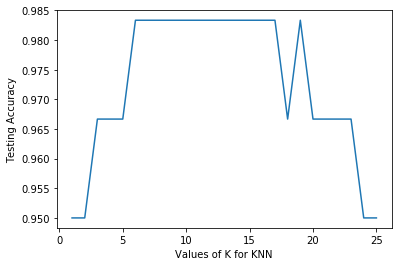

In [20]:
import matplotlib.pyplot as plt
#allow plots to appear witin the notebook
%matplotlib inline

#plot the relationship between K and testing accuracy
plt.plot(k_range,scores)
plt.xlabel('Values of K for KNN')
plt.ylabel('Testing Accuracy')

In [21]:
#Now we look into making predictions on out-of-sample data 
#instantiate the modek with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

#train the model with X and y(not X_train and y_train), fir it

knn.fit(X,y)
knn.predict([[3,5,4,2]])


array([1])